## Heart Diesease Prediction 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### EDA

In [62]:
df = pd.read_csv('../datasets/heart.csv')

In [108]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [64]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [109]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [66]:
df.shape

(918, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [68]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [69]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

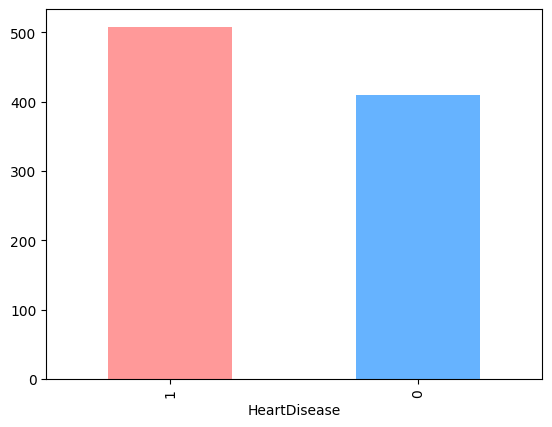

In [70]:
df["HeartDisease"].value_counts().plot(kind='bar', color=['#FF9999', '#66B3FF'])

In [71]:
def ploring(var,num):
    plt.subplot(2,2,num)   # setting subplot canvas having 2 row and 2 columns
    sns.histplot(df[var], kde=True)

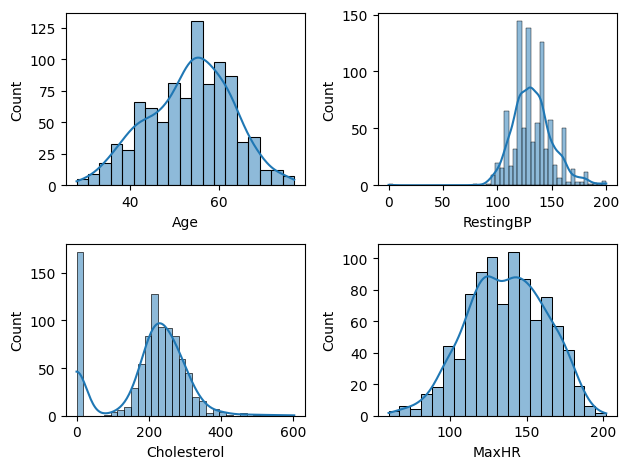

In [72]:
ploring("Age", 1)  # on all numperic variables
ploring("RestingBP", 2)  
ploring("Cholesterol", 3)
ploring("MaxHR", 4)
plt.tight_layout() # to avoid overlapping of subplots

In [73]:
df["RestingBP"].unique() # one value '0': there is no person with 0 resting blood pressure, so we can replace it with the mean value of the column

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [74]:
df["RestingBP"].value_counts() 

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64

In [75]:
df["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [76]:
df["Cholesterol"].unique() # one value '0': there is no person with 0 cholesterol, so we can replace it with the mean value of the column

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [77]:
df["Cholesterol"].value_counts() # 172 people have 0 cholesterol

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [78]:
ch_mean= df.loc[df["Cholesterol"] != 0]
ch_mean = int(ch_mean["Cholesterol"].mean())
ch_mean

244

In [79]:
if isinstance(ch_mean, int):
	df["Cholesterol"] = df["Cholesterol"].replace(0, ch_mean) # replacing 0 with mean value
else:
	raise ValueError("ch_mean must be an integer")

In [80]:
rest_mean= df.loc[df["RestingBP"] != 0]
rest_mean = rest_mean["RestingBP"].mean()
if isinstance(rest_mean, (int, float)):
	df["RestingBP"] = df["RestingBP"].replace(0, rest_mean).round(2) # replacing 0 with mean value
else:
	raise ValueError("rest_mean must be an integer")


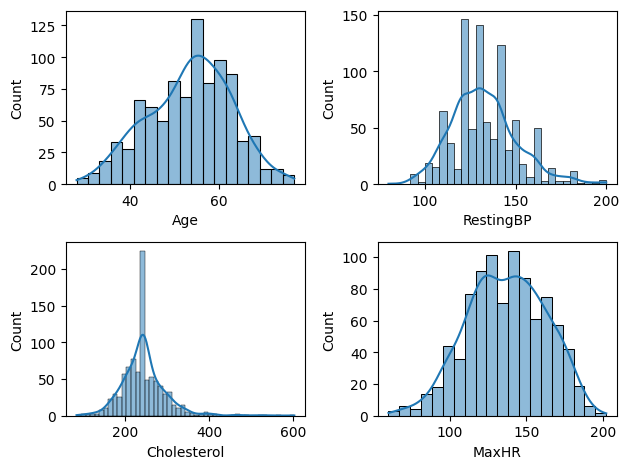

In [81]:
ploring("Age", 1)  # on all numperic variables
ploring("RestingBP", 2)  
ploring("Cholesterol", 3)
ploring("MaxHR", 4)
plt.tight_layout() # to avoid overlapping of subplots

<Axes: xlabel='Sex', ylabel='count'>

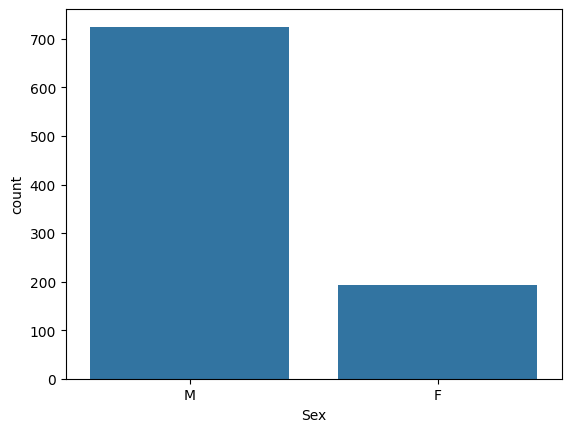

In [82]:
sns.countplot(x = "Sex", data = df)

<Axes: xlabel='ChestPainType', ylabel='count'>

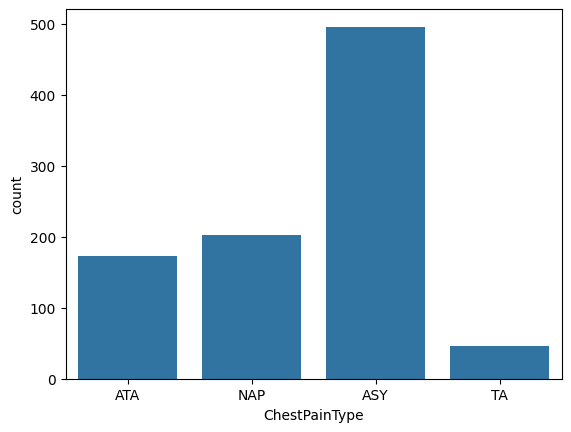

In [83]:
sns.countplot(x = df["ChestPainType"])


<Axes: xlabel='ChestPainType', ylabel='count'>

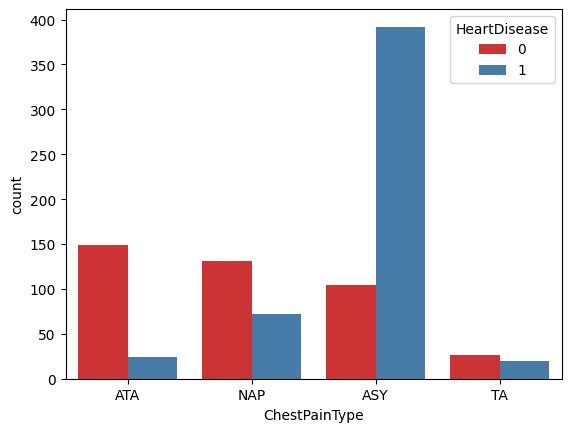

In [106]:
sns.countplot(x ="ChestPainType", hue= "HeartDisease", data = df, palette="Set1")

<Axes: xlabel='Sex', ylabel='count'>

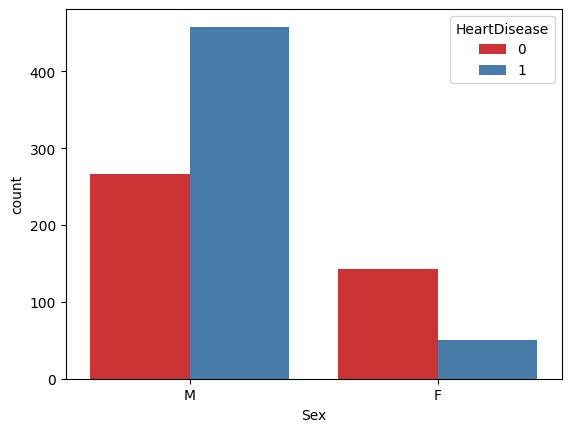

In [107]:
sns.countplot(x ="Sex", hue= "HeartDisease", data = df, palette="Set1")

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

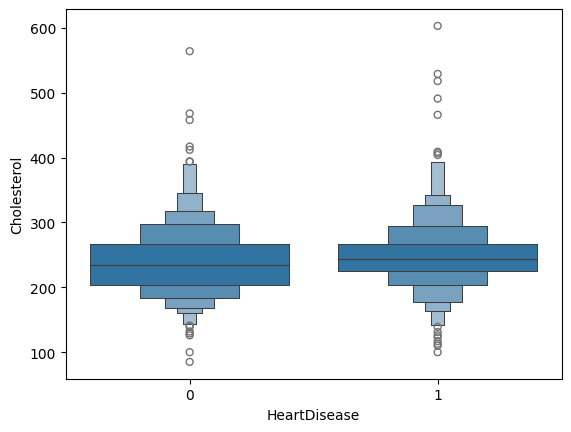

In [86]:
sns.boxenplot(x="HeartDisease",y = "Cholesterol", data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

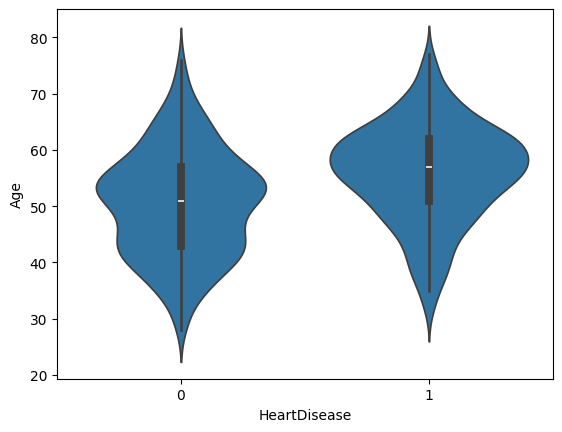

In [87]:
sns.violinplot(x = "HeartDisease", y="Age", data = df)

<Axes: >

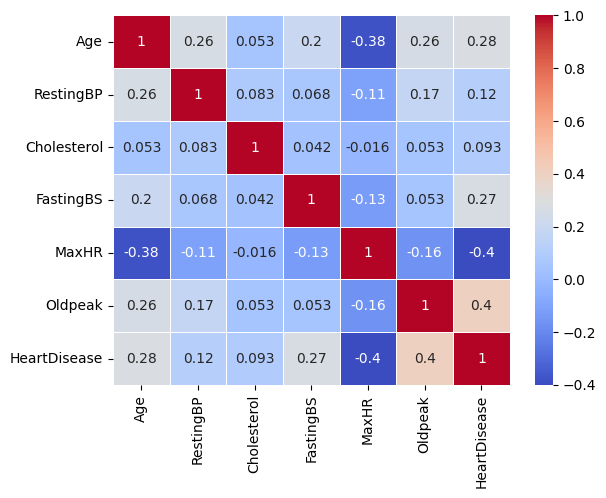

In [88]:
sns.heatmap( df.corr(numeric_only=True), annot=True, cmap='coolwarm' , linewidths=0.5)

## Data preprocessing & Cleaning 
- cleaning already done in prev steps

In [89]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236,0,LVH,174,N,0.0,Flat,1


In [90]:
df_encod = pd.get_dummies(df, drop_first=True)  # encoding categorical variables

In [91]:
df_encod["FastingBS"].value_counts() # 0 - 0, 1 - 1

df_encod.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [92]:
df_encod = df_encod.astype(int)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_col = ["Age", "RestingBP", "Cholesterol", "Oldpeak", "MaxHR"]

df_encod[num_col] = scaler.fit_transform(df_encod[num_col])

df_encod.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [95]:
X = df_encod.drop("HeartDisease", axis=1)
y = df_encod["HeartDisease"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [98]:
models ={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(probability=True)
}

In [99]:
results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # class_report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1
    })

In [100]:
results

[{'Model': 'LogisticRegression',
  'Accuracy': 0.8695652173913043,
  'F1 Score': 0.8857142857142857},
 {'Model': 'KNeighborsClassifier',
  'Accuracy': 0.8641304347826086,
  'F1 Score': 0.8815165876777251},
 {'Model': 'DecisionTreeClassifier',
  'Accuracy': 0.7717391304347826,
  'F1 Score': 0.7961165048543689},
 {'Model': 'GaussianNB',
  'Accuracy': 0.8532608695652174,
  'F1 Score': 0.8682926829268293},
 {'Model': 'SVC',
  'Accuracy': 0.8478260869565217,
  'F1 Score': 0.8679245283018868}]

In [101]:
# highest_accuracy = max(results, key=lambda x: x['Accuracy'])
# print(f"Highest Accuracy Model: {highest_accuracy['Model']} with accuracy {highest_accuracy['Accuracy']}")
    

In [102]:
high=0
for res in results:
    if res["Accuracy"] > high:
        high = res["Accuracy"]
        model_name = res["Model"]
print(f"Highest Accuracy Model: {model_name} with accuracy {high}")

Highest Accuracy Model: LogisticRegression with accuracy 0.8695652173913043


In [103]:
# results.sort(key=lambda x: x['Accuracy'], reverse=True)

# results[0]["Accuracy"]

In [104]:
import joblib
joblib.dump(models["LogisticRegression"], f"hdLogisticModel.pkl") 
joblib.dump(scaler, f"hdScaler.pkl")
joblib.dump(X.columns.tolist(), f"hdFeatures.pkl")


['hdFeatures.pkl']

In [105]:
# Display the features that will be used in the model
print("Features used in the model:")
print(X.columns.tolist())
print(f"\nTotal features: {len(X.columns)}")

Features used in the model:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

Total features: 15
